In [36]:
from keras import layers
from keras import models
from keras.optimizers import Adam

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(56, 56, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.summary()

from keras import optimizers


model.compile(optimizer=Adam(lr=1e-3),
              loss='categorical_crossentropy',
             metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 54, 54, 32)        896       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1600)              0         
__________

In [38]:
from keras.preprocessing.image import ImageDataGenerator
import keras.preprocessing.image as Image
clsdir = "/Users/kanza/Desktop/cluster0210/"


datagen = Image.ImageDataGenerator(
            featurewise_center = False,
            samplewise_center = False,
            featurewise_std_normalization = False,
            samplewise_std_normalization = False,
            zca_whitening = False,
            rotation_range = 90,
            width_shift_range = 0.3,
            height_shift_range = 0.3,
            horizontal_flip = True,
            vertical_flip = False,
            validation_split = 0.2,
            rescale=1./255
        )

train_generator=datagen.flow_from_directory(
            clsdir,
            target_size=(56,56),
            batch_size=20,
            class_mode='categorical',
            shuffle=True,
            subset = "training"
        )

validation_generator = datagen.flow_from_directory(
            clsdir,
            target_size=(56,56),
            batch_size=20,
            class_mode='categorical',
            shuffle=True,
            subset = "validation"
        )

Found 886 images belonging to 4 classes.
Found 219 images belonging to 4 classes.


In [39]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=50
    )

Epoch 1/50
100/100 [==============================] - 21s 215ms/step - loss: 1.2550 - acc: 0.3897 - val_loss: 1.0970 - val_acc: 0.4900
Epoch 2/50
100/100 [==============================] - 16s 160ms/step - loss: 0.8884 - acc: 0.6222 - val_loss: 0.8735 - val_acc: 0.5688
Epoch 3/50
100/100 [==============================] - 17s 168ms/step - loss: 0.5774 - acc: 0.7658 - val_loss: 0.8188 - val_acc: 0.6807
Epoch 4/50
100/100 [==============================] - 18s 182ms/step - loss: 0.4748 - acc: 0.8195 - val_loss: 0.6527 - val_acc: 0.7186
Epoch 5/50
100/100 [==============================] - 18s 183ms/step - loss: 0.3790 - acc: 0.8398 - val_loss: 0.6898 - val_acc: 0.7259
Epoch 6/50
100/100 [==============================] - 26s 261ms/step - loss: 0.3705 - acc: 0.8580 - val_loss: 0.5534 - val_acc: 0.7417
Epoch 7/50
100/100 [==============================] - 20s 197ms/step - loss: 0.3275 - acc: 0.8707 - val_loss: 0.4319 - val_acc: 0.7771
Epoch 8/50
100/100 [==============================] - 2

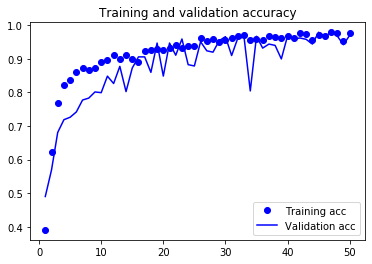

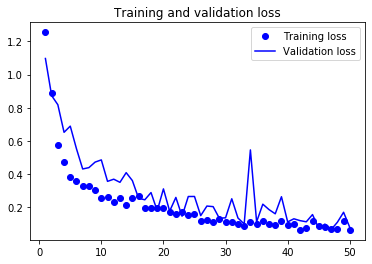

In [40]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

#正解率plot
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()


#損失値をplot
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [12]:
#VGG16を使うここから実行してOK
from keras.applications import VGG16
conv_base=VGG16(weights='imagenet',
               include_top=False,
               input_shape=(150,150,3))

from keras import models
from keras import layers
from keras.optimizers import Adam

model=models.Sequential()
model.add(layers.Dense(256,activation='relu',input_dim=4*4*512))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer=Adam(lr=1e-3),
              loss='categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import os 
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

clsdir = "/Users/kanza/Desktop/cluster0129/"


datagen = Image.ImageDataGenerator(
            featurewise_center = False,
            samplewise_center = False,
            featurewise_std_normalization = False,
            samplewise_std_normalization = False,
            zca_whitening = False,
            rotation_range = 90,
            width_shift_range = 0.3,
            height_shift_range = 0.3,
            horizontal_flip = True,
            vertical_flip = False,
            validation_split = 0.1,
            rescale=1./255
        )

train_generator=datagen.flow_from_directory(
            clsdir,
            target_size=(150,150),
            batch_size=20,
            class_mode='categorical',
            shuffle=True,
            subset = "training"
        )

validation_generator = datagen.flow_from_directory(
            clsdir,
            target_size=(150,150 ),
            batch_size=20,
            class_mode='categorical',
            shuffle=True,
            subset = "validation"
        )

